In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv('../data/brainsize.csv', delimiter=';', na_values='.')
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna()

In [3]:
def t_score_null(mu, sample_list, significant_level=.5):
    sample_mean = np.mean(sample_list)
    sample_std = np.std(sample_list)
    sample_size = len(sample_list)
    t_score = (sample_mean - mu)/(sample_std/np.sqrt(sample_size))
    
    p_val = 2 * t_score * scipy.stats.norm.cdf(-np.abs(t_score))
    return p_val

In [4]:
def get_by_gender(sample_df, col):
    return df.loc[df['Gender'] == 'Male', col], df.loc[df['Gender'] == 'Female', col]

In [9]:
def test_each(sample_df, significant_level=.05):
    for col in df.columns[1:-1]:
        _, p = scipy.stats.ttest_ind(*get_by_gender(sample_df, col))
        print(f'{col}: {"accept" if p > significant_level else "reject"} null hypotheses')

In [10]:
test_each(df)

FSIQ: accept null hypotheses
VIQ: accept null hypotheses
PIQ: accept null hypotheses
Weight: reject null hypotheses
Height: reject null hypotheses


In [11]:
df.columns

Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')

In [19]:
a = df.groupby('Gender')['VIQ'].mean()

In [25]:
t_score_null(a['Male'], df.loc[df['Gender'] == 'Female', 'VIQ'])

-0.2694771936341504

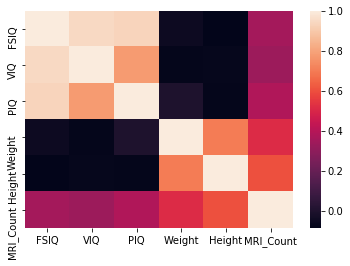

In [15]:
sns.heatmap(df.corr())